In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


### Load Fashion MNIST

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
print("train_images shape ==> ", train_images.shape)
print("train_labels shape ==> ", train_labels.shape)
print()
print("test_images shape ==> ", test_images.shape)
print("test_labels shape ==> ", test_labels.shape)

train_images shape ==>  (60000, 28, 28)
train_labels shape ==>  (60000,)

test_images shape ==>  (10000, 28, 28)
test_labels shape ==>  (10000,)


In [23]:
pixel_range = np.array(list(set(train_images.flatten())))
print(pixel_range.min(), pixel_range.max())

0 255


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
              'Ankle Boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

### Data Preprocessing

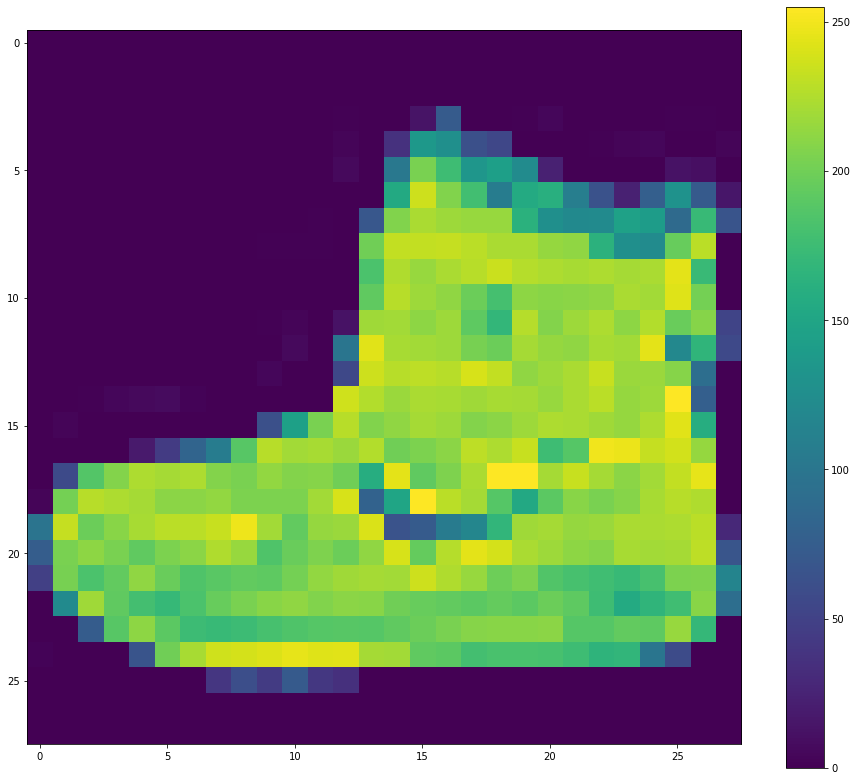

In [27]:
plt.figure(figsize=(16,14))

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.show()

In [29]:
train_images = train_images / 255.0
test_images = test_images / 255.0

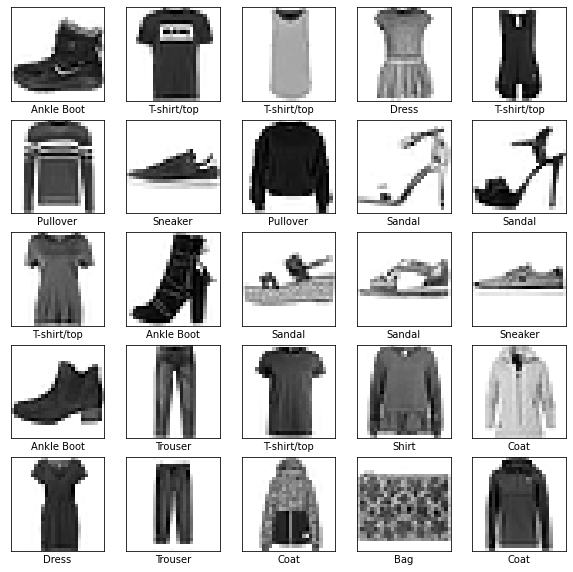

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Config Model

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile Model

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Fit

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4977 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3737 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3365 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3131 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2796 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.2691 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2560 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2493 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

### Evaludate Accuracy

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3546 - accuracy: 0.8755

Test accuracy: 0.8755000233650208


### Predict

In [37]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(test_images)

In [39]:
predictions[0]

array([4.4058659e-05, 2.7152292e-09, 1.2408680e-06, 1.8486727e-08,
       1.4234677e-05, 1.6634963e-03, 2.9980688e-06, 1.9315504e-01,
       1.5722308e-05, 8.0510312e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

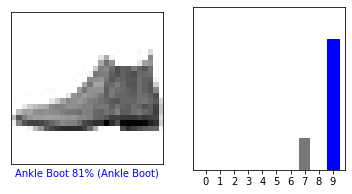

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

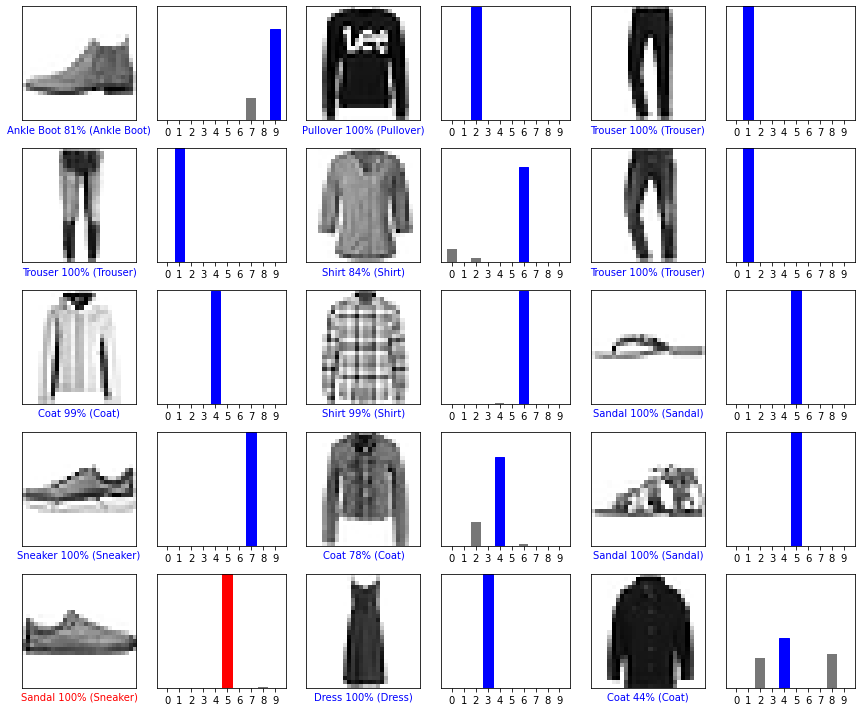

In [47]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 훈련된 모델 사용하기

In [48]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [49]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.9954946e-04 3.3077818e-12 9.9908352e-01 2.0047178e-12 3.6594563e-04
  1.7292203e-08 2.5089135e-04 1.0915856e-12 3.2299541e-09 1.5047204e-13]]


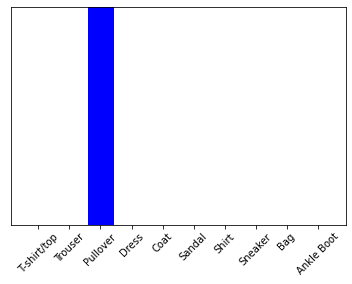

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [52]:
np.argmax(predictions_single[0])

2